#  <center> <font style="color:rgb(100,109,254)">Template matching  </font> </center>


Template matching is a method which can be used for simple object detection, specially detecting things which don't change in appearance such as GUI elements. In template matching you find the location of target image patch (called template) in the input image.

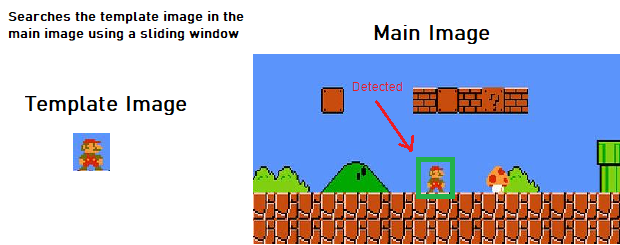

OpenCV comes with a function `cv2.matchTemplate()` for this purpose. It performs a 2D convolution i.e. slides the template image over the input image and compares the template image and the patch of the image under the template image checking how good of a match they are, several mathematical comparison methods are implemented in OpenCV. At the end a single channel image is returned where each pixel denotes how much does the neighbourhood of that pixel match with template. The higher the value, greater the match.

If the input image is of size (WxH) and template image is of size (wxh), output image will have a size of (W-w+1, H-h+1). Once you obtain the result of template matching, you can use `cv2.minMaxLoc()` function to find where is the maximum/minimum value. Now the max point you obtain can be used as the top-left corner of the rectangle and it will have the same height and width of the template. This rectangle is your detected template.

**Function:**

[```	result = cv2.matchTemplate(image, template, method[, result[, mask]]) ```](https://docs.opencv.org/4.2.0/df/dfb/group__imgproc__object.html#ga586ebfb0a7fb604b35a23d85391329be)

**Params:**

- `image`	Image where the search is running. It must be 8-bit or 32-bit floating-point.
- `template`	Searched template. It must be not greater than the source image and have the same data type.
- `result`	Map of comparison results. It must be single-channel 32-bit floating-point. If image is W×H and templ is w×h , then result is (W−w+1)×(H−h+1) .
- `method`	Parameter specifying the comparison method, see [TemplateMatchModes](https://docs.opencv.org/master/df/dfb/group__imgproc__object.html#ga3a7850640f1fe1f58fe91a2d7583695d)
- `mask`	Mask of searched template. It must have the same data type and size with template. It is not set by default. Currently, only the TM_SQDIFF and TM_CCORR_NORMED methods are supported.

**Note: If you are using `cv2.TM_SQDIFF` or `cv2.TM_SQDIFF_NORMED` as comparison method, than minimum value of result of template matching gives the best match.**

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

##  <font style="color:rgb(134,19,348)"> Template Matching For Single Object In Opencv </font>

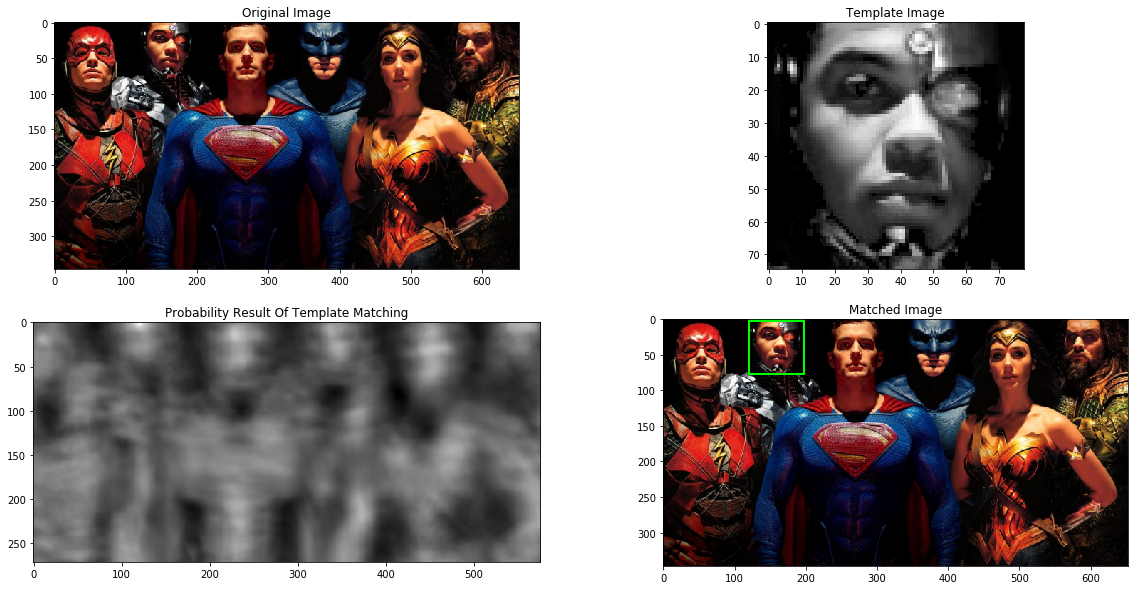

In [15]:
img = cv2.imread("media/M4/justice.PNG")
original = img.copy()

gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
template = cv2.imread("media/M4/cyborg.PNG", 0)

# Get the height, width of template, will be used for drawing 
h, w = template.shape

# Perform Template Matching using cv2.TM_CCOEFF_NORMED Method.
result = cv2.matchTemplate(gray_img, template, cv2.TM_CCOEFF_NORMED)

# Returns the Min and Max value found in the image and aslo their respective locations.
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

# Draw the rectangle using the max_loc as top_left corner. If you're using cv2.TM_SQDIFF it will be min_loc
top_left = max_loc
bottom_right = (top_left[0] + w, top_left[1] + h)
cv2.rectangle(img, top_left, bottom_right, (0, 255, 0), 2)
    
plt.figure(figsize=[20,10])
plt.subplot(221);plt.imshow(original[:,:,::-1]);plt.title("Original Image");
plt.subplot(222);plt.imshow(template, cmap='gray');plt.title("Template Image");
plt.subplot(223);plt.imshow(result, cmap='gray');plt.title("Probability Result Of Template Matching");
plt.subplot(224);plt.imshow(img[:,:,::-1]);plt.title("Matched Image");

**Note: Template matching can also be done on a color images but you should only run on color images if its actually required in order to avoid any unnecessary computation**

## <font style="color:rgb(134,19,348)">Template Matching For Multiple Objects In Opencv</font>
Suppose you are searching for an object which has multiple occurrences in the input image. Consider the example below:

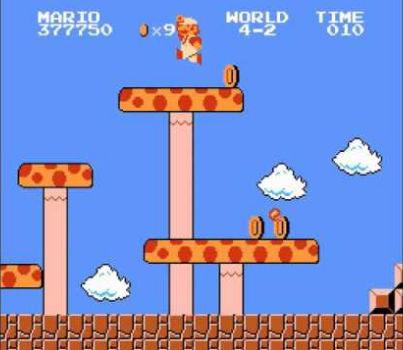

So if you wanted to detect all clouds in the above image then `cv2.minMaxLoc()` won't give you all the locations. So what you can do is use a simple threshold, like 80% or 90% to filter all strongest detections which are possibility your target objects.

(array([135, 160, 261], dtype=int64), array([331, 256,  80], dtype=int64))


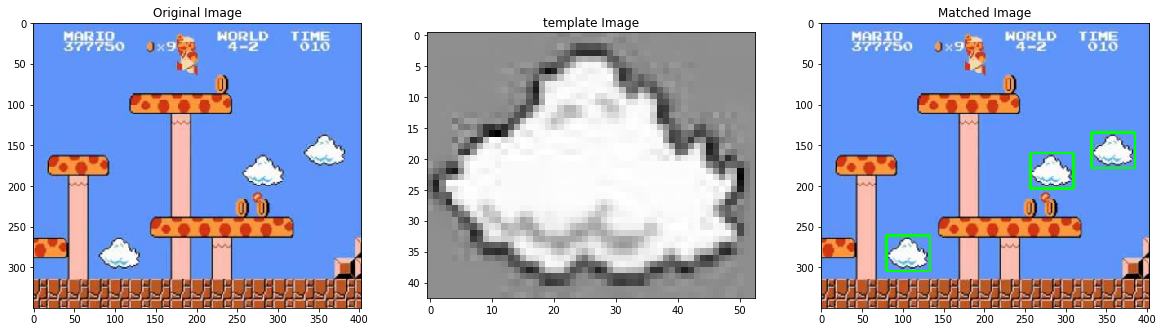

In [31]:
img = cv2.imread("media/M4/mariogame.PNG")
origimg= img.copy()

gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
template = cv2.imread("media/M4/cloud.PNG",0)
h,w  = template.shape

result = cv2.matchTemplate(gray_img, template,cv2.TM_CCOEFF_NORMED)

# Define a threshold, 90% is a good value here.
threshold = 0.95

# Get all x,y points where value is higher than threshold
loc = np.where(result >= threshold)
print(loc)

# The single star * here unpacks the sequence/collection into positional arguments, other wise loc is a tuple with two arrays
# as elements. i.e. loc = ([x1, x2, x3 ...],[y1, y2 ,y3 ...]) After unpacking we have 2 lists, one containing all x values
# and the other y values. We zip both x,y into a tuple pt and iterate through all created tuples.
for pt in zip(*loc):

    #[::-1] this reverses the list  so we can get w,h insted of h,w
    pt = pt[::-1]
    
    top_left = pt
    bottom_right = (pt[0] + w, pt[1] + h)
    cv2.rectangle(img, top_left, bottom_right, (0, 255, 0), 2)
  
plt.figure(figsize=[20,10])
plt.subplot(131);plt.imshow(origimg[:,:,::-1]);plt.title("Original Image");
plt.subplot(132);plt.imshow(template[:,:],cmap='gray');plt.title("template Image");
plt.subplot(133);plt.imshow(img[:,:,::-1]);plt.title("Matched Image");

**Tip to make template matching matching scale and rotation invariant:** Template matching is only translation invariant but you can make it rotation and scale invariant by a simple trick but it comes at a computational cost. So what you can do is loop over the image at multiple scales storing the highest match at each scale and then use the one with the best match. Similarly you can loop over the image at different orientations and check for best match.